In [1]:
pip install seaborn scikit-learn pandas "numpy<1.25.0"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.read_csv('data/test.csv')  # Substituir com o caminho do CSV
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [3]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

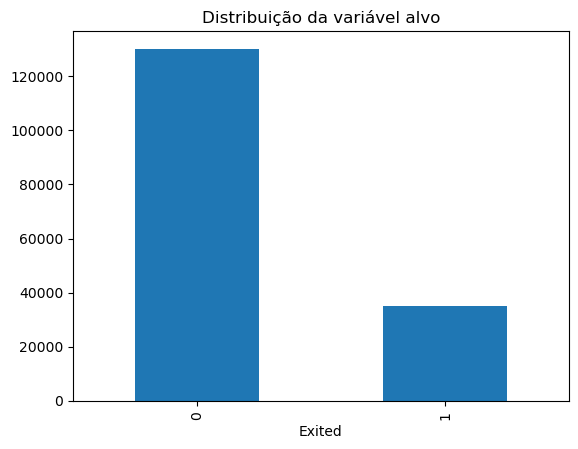

In [6]:
df_train['Exited'].value_counts().plot(kind='bar')
plt.title("Distribuição da variável alvo")
plt.show()

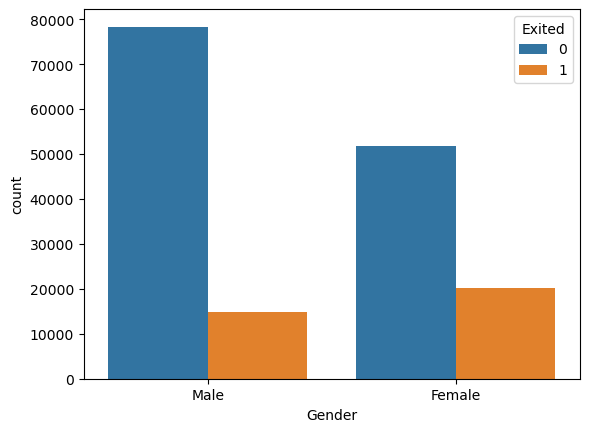

In [7]:
df_train.select_dtypes(include='object').nunique()
sns.countplot(data=df_train, x='Gender', hue='Exited')
plt.show()

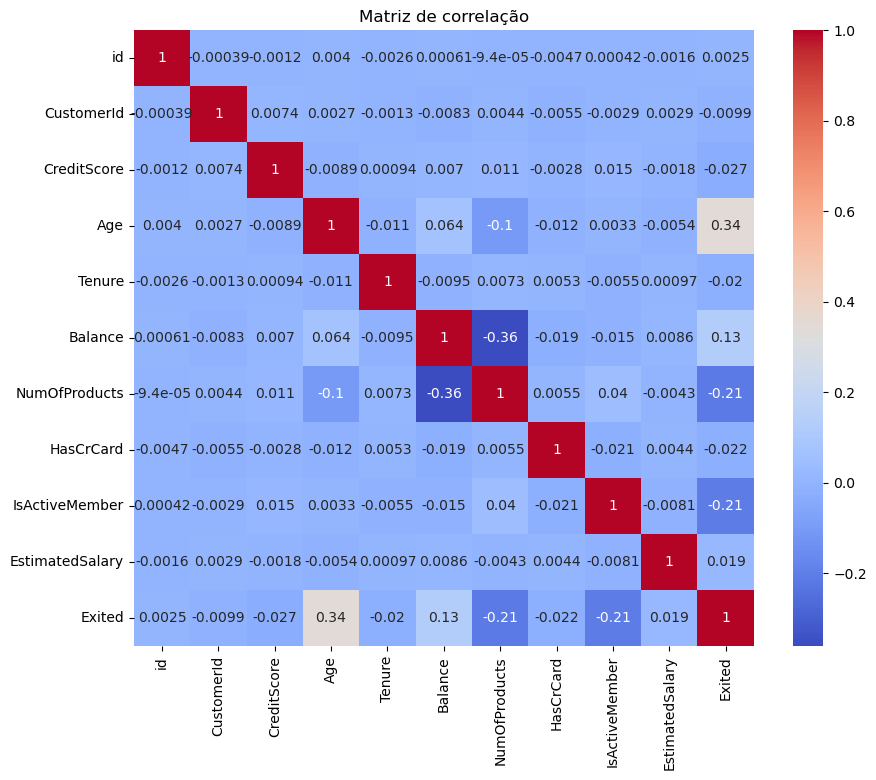

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlação")
plt.show()

Métricas no conjunto de teste:
Accuracy:  0.7980
Precision: 0.5218
Recall:    0.5404
F1 Score:  0.5309


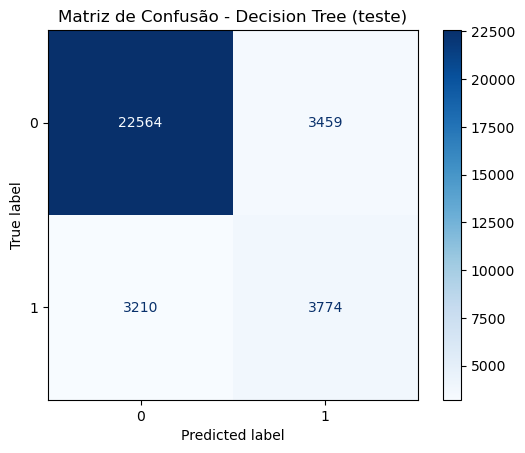

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# 1. Separar X e y
X = df_train.drop(columns=["id", "CustomerId", "Surname", "Exited"])
y = df_train["Exited"]

# 2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Definir colunas
categorical_cols = ["Geography", "Gender"]
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 4. Criar pré-processadores
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# 5. Transformar os dados
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 6. Treinar modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# 7. Avaliar no conjunto de teste
y_pred_test = model.predict(X_test_processed)

# Calcular métricas
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# 8. Guardar resultados no dicionário
results = {}
results["Decision Tree"] = {
    "Accuracy": accuracy_test,
    "Precision": precision_test,
    "Recall": recall_test,
    "F1 Score": f1_test,
    "Confusion Matrix": cm_test
}

# Mostrar resultados
print("Métricas no conjunto de teste (Decision Tree):")
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1 Score:  {f1_test:.4f}")

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp_test.plot(cmap="Blues")
plt.title("Matriz de Confusão - Decision Tree (teste)")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 9. Treinar modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Pode ajustar o número de vizinhos (n_neighbors)
knn_model.fit(X_train_processed, y_train)

# Avaliar no conjunto de teste
y_pred_knn = knn_model.predict(X_test_processed)

# Calcular métricas
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Guardar resultados no dicionário
results["k-NN"] = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1 Score": f1_knn,
    "Confusion Matrix": cm_knn
}

# Mostrar resultados
print("\nMétricas no conjunto de teste (k-NN):")
print(f"Accuracy:  {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall:    {recall_knn:.4f}")
print(f"F1 Score:  {f1_knn:.4f}")

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap="Blues")
plt.title("Matriz de Confusão - k-NN (teste)")
plt.show()